<a href="https://colab.research.google.com/github/SCCabanillas/Alzheimer_NN/blob/main/Alzheimer_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi-Class Classification

In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

In [ ]:
data_dir = 'Alzheimer_s Dataset/'
image_sz = (176, 208)
batch_sz = 32
num_classes = 4

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir+"train/", validation_split =0.2, subset = 'training', seed = 123, image_size=image_sz, batch_size=batch_sz, shuffle=True, color_mode='grayscale'
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir+"train/", image_size=image_sz, batch_size=batch_sz, validation_split=0.2, subset = 'validation', seed = 123, shuffle=True, color_mode='grayscale'
    )

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir+"test/", labels ='inferred', image_size=image_sz, batch_size=batch_sz, shuffle=True, color_mode='grayscale'
)

Found 6339 files belonging to 4 classes.
Using 5072 files for training.
Found 6339 files belonging to 4 classes.
Using 1267 files for validation.
Found 60 files belonging to 4 classes.


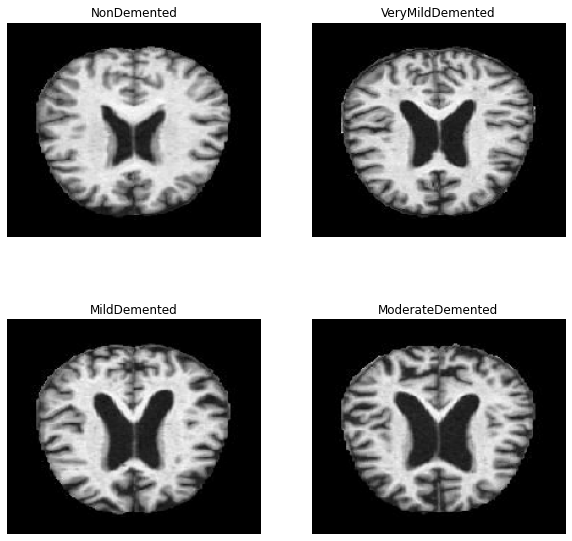

In [ ]:
train_non_dir = os.path.join(data_dir+'train', '1_NonDemented')
train_verymild_dir = os.path.join(data_dir+'train', '2_VeryMildDemented')
train_mild_dir = os.path.join(data_dir+'train', '3_MildDemented')
train_moderate_dir = os.path.join(data_dir+'train', '4_ModerateDemented')

path1 = os.path.join(train_non_dir, os.listdir(train_non_dir)[1])
path2 = os.path.join(train_verymild_dir, os.listdir(train_verymild_dir)[1])
path3 = os.path.join(train_mild_dir, os.listdir(train_mild_dir)[1])
path4 = os.path.join(train_moderate_dir, os.listdir(train_moderate_dir)[1])

img1 = image.load_img(path1, target_size = image_sz, interpolation = 'nearest')
img2 = image.load_img(path2, target_size = image_sz, interpolation = 'nearest')
img3 = image.load_img(path3, target_size = image_sz, interpolation = 'nearest')
img4 = image.load_img(path4, target_size = image_sz, interpolation = 'nearest')

images = [img1, img2, img3, img4]
class_names = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']

def plot_images(images):
    fig = plt.figure(figsize=(10,10))

    i = 1
    for image in images:
        fig.add_subplot(2,2,i)
        plt.imshow(image)
        plt.axis('off')
        plt.title(class_names[i-1])
        i += 1

plot_images(images)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE # Configure the dataset for performance
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Simple 4-Layer Network

In [ ]:
model1 = Sequential([
  layers.Rescaling(1./255),
  layers.Flatten(),
  layers.Dense(60, activation='relu'),
  layers.Dense(30, activation='relu'),
  layers.Dense(10, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=100,
)

Epoch 1/100
159/159 [==============================] - 3s 17ms/step - loss: 1.0818 - accuracy: 0.4931 - val_loss: 0.9279 - val_accuracy: 0.5209
Epoch 2/100
159/159 [==============================] - 2s 10ms/step - loss: 0.9037 - accuracy: 0.5607 - val_loss: 0.8575 - val_accuracy: 0.5856
Epoch 3/100
159/159 [==============================] - 1s 9ms/step - loss: 0.8493 - accuracy: 0.5915 - val_loss: 0.8586 - val_accuracy: 0.6133
Epoch 4/100
159/159 [==============================] - 1s 9ms/step - loss: 0.7859 - accuracy: 0.6248 - val_loss: 0.7314 - val_accuracy: 0.6567
Epoch 5/100
159/159 [==============================] - 1s 9ms/step - loss: 0.7488 - accuracy: 0.6520 - val_loss: 0.7115 - val_accuracy: 0.6677
Epoch 6/100
159/159 [==============================] - 1s 9ms/step - loss: 0.7069 - accuracy: 0.6776 - val_loss: 0.6710 - val_accuracy: 0.6953
Epoch 7/100
159/159 [==============================] - 1s 9ms/step - loss: 0.6829 - accuracy: 0.6903 - val_loss: 0.6306 - val_accuracy: 0.70

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 176, 208, 1)       0         
                                                                 
 flatten (Flatten)           (None, 36608)             0         
                                                                 
 dense (Dense)               (None, 60)                2196540   
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 4)                 44        
                                                                 
Total params: 2,198,724
Trainable params: 2,198,724
Non-

In [ ]:
score1 = model1.evaluate(test_dataset)
print('test_acc:', score1[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.5565 - accuracy: 0.8833
test_acc: 0.8833333253860474


### Convolutional Neural Network

In [ ]:
model2 = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=10,
)

Epoch 1/10
159/159 [==============================] - 39s 241ms/step - loss: 0.9717 - accuracy: 0.5343 - val_loss: 0.8885 - val_accuracy: 0.6369
Epoch 2/10
159/159 [==============================] - 38s 240ms/step - loss: 0.7298 - accuracy: 0.6731 - val_loss: 0.5784 - val_accuracy: 0.7806
Epoch 3/10
159/159 [==============================] - 39s 245ms/step - loss: 0.3971 - accuracy: 0.8415 - val_loss: 0.3520 - val_accuracy: 0.8682
Epoch 4/10
159/159 [==============================] - 39s 245ms/step - loss: 0.1884 - accuracy: 0.9351 - val_loss: 0.3914 - val_accuracy: 0.8785
Epoch 5/10
159/159 [==============================] - 39s 246ms/step - loss: 0.0944 - accuracy: 0.9716 - val_loss: 0.1181 - val_accuracy: 0.9684
Epoch 6/10
159/159 [==============================] - 39s 246ms/step - loss: 0.0708 - accuracy: 0.9752 - val_loss: 0.1477 - val_accuracy: 0.9597
Epoch 7/10
159/159 [==============================] - 39s 246ms/step - loss: 0.0226 - accuracy: 0.9941 - val_loss: 0.0657 - val_ac

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 176, 208, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 176, 208, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 104, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 104, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 44, 52, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 52, 64)       

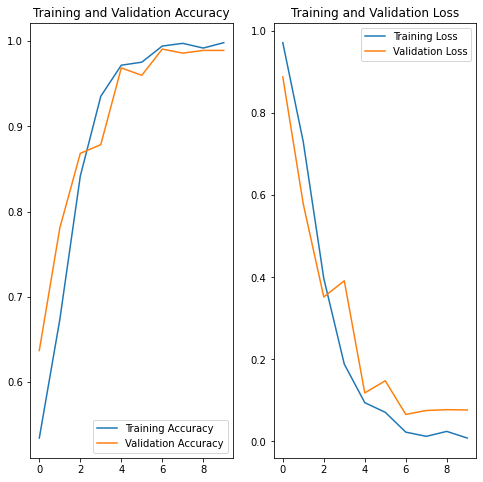

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score2 = model2.evaluate(test_dataset)
print('test_acc:', score2[1])

2/2 [==============================] - 0s 46ms/step - loss: 0.8115 - accuracy: 0.9167
test_acc: 0.9166666865348816


In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_dataset:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model2.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
true_labels = tf.concat([item for item in y_true], axis = 0)
pred_labels = tf.concat([item for item in y_pred], axis = 0)

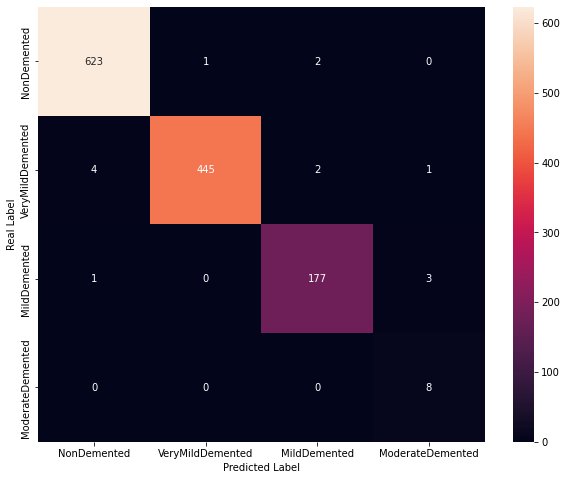

In [ ]:
def show_confusion_matrix(cm, labels):
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, xticklabels=labels, yticklabels=labels, 
              annot=True, fmt='g')
  plt.xlabel('Predicted Label')
  plt.ylabel('Real Label')
  plt.show()

cm = tf.math.confusion_matrix(pred_labels,true_labels)

show_confusion_matrix(cm, class_names)

## Binary Classification

In [ ]:
data_dir = "/content/Alzheimer_Binary"

train_bin_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir+"/train/", validation_split =0.2, subset = 'training', seed = 123, image_size=image_sz, batch_size=batch_sz, shuffle=True, color_mode='grayscale'
)

val_bin_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir+"/train/", image_size=image_sz, batch_size=batch_sz, validation_split=0.2, subset = 'validation', seed = 123, shuffle=True, color_mode='grayscale'
    )

test_bin_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir+"/test/", labels ='inferred', image_size=image_sz, batch_size=batch_sz, shuffle=True, color_mode='grayscale'
)

Found 5197 files belonging to 2 classes.
Using 4158 files for training.
Found 5197 files belonging to 2 classes.
Using 1039 files for validation.
Found 1200 files belonging to 2 classes.


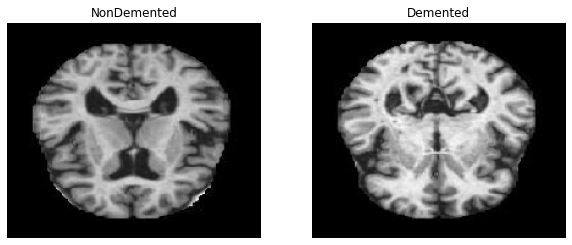

In [ ]:
train_non_dir = os.path.join(data_dir+'/train/', 'NonDemented')
train_yes_dir = os.path.join(data_dir+'/train/', 'Demented')

path1 = os.path.join(train_non_dir, os.listdir(train_non_dir)[1])
path2 = os.path.join(train_yes_dir, os.listdir(train_yes_dir)[1])

img1 = image.load_img(path1, target_size = image_sz, interpolation = 'nearest')
img2 = image.load_img(path2, target_size = image_sz, interpolation = 'nearest')

images = [img1, img2]
class_names = ['NonDemented', 'Demented']

def plot_images(images):
    fig = plt.figure(figsize=(10,10))

    i = 1
    for image in images:
        fig.add_subplot(2,2,i)
        plt.imshow(image)
        plt.axis('off')
        plt.title(class_names[i-1])
        i += 1

plot_images(images)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_bin_dataset = train_bin_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_bin_dataset = val_bin_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# CNN Model - binary
model_bin = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]
model_bin.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

In [ ]:
history_bin = model_bin.fit(
  train_bin_dataset,
  validation_data=val_bin_dataset,
  epochs=10,
)

Epoch 1/10
130/130 [==============================] - 20s 70ms/step - loss: 0.6407 - tp: 1286.0000 - fp: 785.0000 - tn: 1306.0000 - fn: 781.0000 - accuracy: 0.6234 - precision: 0.6210 - recall: 0.6222 - auc: 0.6782 - prc: 0.6813 - val_loss: 0.5963 - val_tp: 284.0000 - val_fp: 76.0000 - val_tn: 430.0000 - val_fn: 249.0000 - val_accuracy: 0.6872 - val_precision: 0.7889 - val_recall: 0.5328 - val_auc: 0.7765 - val_prc: 0.8085
Epoch 2/10
130/130 [==============================] - 6s 50ms/step - loss: 0.5160 - tp: 1490.0000 - fp: 504.0000 - tn: 1587.0000 - fn: 577.0000 - accuracy: 0.7400 - precision: 0.7472 - recall: 0.7209 - auc: 0.8211 - prc: 0.8286 - val_loss: 0.4961 - val_tp: 458.0000 - val_fp: 184.0000 - val_tn: 322.0000 - val_fn: 75.0000 - val_accuracy: 0.7507 - val_precision: 0.7134 - val_recall: 0.8593 - val_auc: 0.8587 - val_prc: 0.8720
Epoch 3/10
130/130 [==============================] - 7s 51ms/step - loss: 0.4059 - tp: 1658.0000 - fp: 385.0000 - tn: 1706.0000 - fn: 409.0000 - a

In [ ]:
model_bin.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 176, 208, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 176, 208, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 104, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 104, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 44, 52, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 52, 64)        1

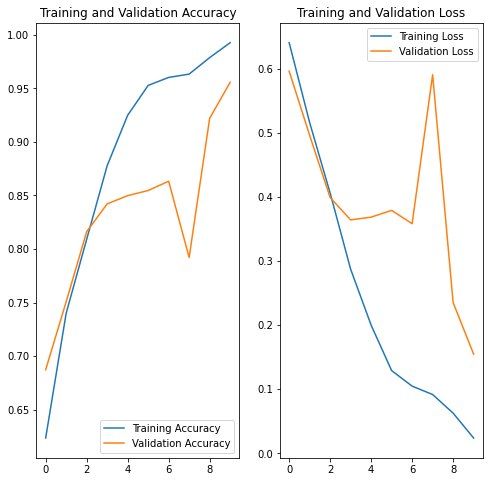

In [ ]:
acc_bin = history_bin.history['accuracy']
val_acc_bin = history_bin.history['val_accuracy']

loss_bin = history_bin.history['loss']
val_loss_bin = history_bin.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_bin, label='Training Accuracy')
plt.plot(epochs_range, val_acc_bin, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_bin, label='Training Loss')
plt.plot(epochs_range, val_loss_bin, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score_bin = model_bin.evaluate(test_bin_dataset)
print('test_acc:', score_bin[5])

38/38 [==============================] - 1s 30ms/step - loss: 0.1199 - tp: 575.0000 - fp: 30.0000 - tn: 570.0000 - fn: 25.0000 - accuracy: 0.9542 - precision: 0.9504 - recall: 0.9583 - auc: 0.9908 - prc: 0.9894
test_acc: 0.9541666507720947


In [ ]:
y_pred_bin = []  # store predicted labels
y_true_bin = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_bin_dataset:   # use dataset.unbatch() with repeat
   # append true labels
   y_true_bin.append(label_batch)
   # compute predictions
   preds = model_bin.predict(image_batch)
   # append predicted labels
   
   y_pred_bin.append(preds.round())
   

# convert the true and predicted labels into tensors
true_labels_bin = tf.concat([item for item in y_true_bin], axis = 0)
pred_labels_bin = tf.concat([item for item in y_pred_bin], axis = 0)

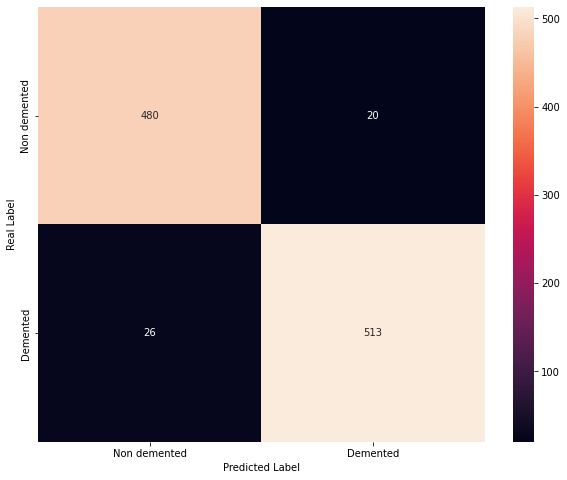

In [ ]:
cm_bin = tf.math.confusion_matrix(pred_labels_bin,true_labels_bin)

show_confusion_matrix(cm_bin, ["Non demented","Demented"])